## Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

caffe_root = '/home/dmitry/caffe_vis/'  
import sys
sys.path.insert(0, caffe_root + 'python')
import caffe
from caffe.proto import caffe_pb2

%run feature_extraction/get_data.py 
%run feature_extraction/eval.py 

def llfun(pred):
    
    epsilon = 1e-15
    pred = np.maximum(epsilon, pred)
    pred = np.minimum(1-epsilon, pred)
    ll = np.sum(np.log(pred))
    ll = ll * -1.0/len(pred)
    return ll

## Load data

In [4]:
import pandas as pd
data = pd.read_csv('data')

### or

In [2]:
data_path = '../data/TIMIT/timit_id/db/sa'
exec_dir = '../data/execs/sa_val_data'

models_to_use  = []
what = 'val'
name = 'bug_less2990'
m = {
'name' : name,
'legend' : 'model 1, 40k',
'savedir' : 'q/' + name,
'exec_dir' : exec_dir,
'deploy' : exec_dir  +'/' + name + '/configs/deploy.prototxt',
'snapshot' : exec_dir  +'/' + name + '/snapshots/_iter_340000.caffemodel',
'test_path' : data_path + '/' + what + '.hdf5/data.hdf5',
'mean' : data_path + '/mean.npy',
}
models_to_use.append(m)

res = []
for m in models_to_use:
    data = get_df(m['test_path'],m['deploy'],m['snapshot'],['ip1','prob']) 
   
    
    data['true_class_prob'] = -1
    unique_labs = data.label.drop_duplicates() 
    for l in unique_labs:
        mask = data.label == l
        data.ix[mask, 'true_class_prob'] = data.ix[mask, 'prob_'+str(l)]
      
    data.sort (['name','n'],inplace = True)
    #res.append(draw_curves(data,0.5,True))

col_names = ['ip1_' + str(x) for x in range(200)]

Starting
(247362, 1, 40, 39)
['ip1', 'prob']


## Compute FR, FA

In [28]:
%run feature_extraction/get_data.py 
%run feature_extraction/eval.py 
import hickle
th_range = np.arange(0.0,0.3,0.05)
for th in th_range:
    print th
    (FR,FA) = draw_curves(data, col_names, 'cosine',th,False)
    hickle.dump((FR,FA),'../data/th/'+str(th),'w')

0.0
excluded 0  files out of 924
1.657412739
1848 851928
0.0890736400704 1.657412739 0.00784169549467
dumping <type 'tuple'> to file <HDF5 file "0.0" (mode r+)>
0.05
excluded 5  files out of 924
1.63716257261
1848 851928
0.075834860314 2.0 0.00962082569843
dumping <type 'tuple'> to file <HDF5 file "0.05" (mode r+)>
0.1
excluded 16  files out of 924
1.63965208807
1848 851928
0.0777304456848 2.0 0.00961134777158
dumping <type 'tuple'> to file <HDF5 file "0.1" (mode r+)>
0.15
excluded 22  files out of 924
1.63603779744
1848 851928
0.0786223690155 2.0 0.00960688815492
dumping <type 'tuple'> to file <HDF5 file "0.15" (mode r+)>
0.2
excluded 31  files out of 924
1.63671615338
1848 851928
0.0799034424406 2.0 0.0096004827878
dumping <type 'tuple'> to file <HDF5 file "0.2" (mode r+)>
0.25
excluded 41  files out of 924
1.63564561415
1848 851928
0.0803249736164 2.0 0.00959837513192
dumping <type 'tuple'> to file <HDF5 file "0.25" (mode r+)>


## Plot it

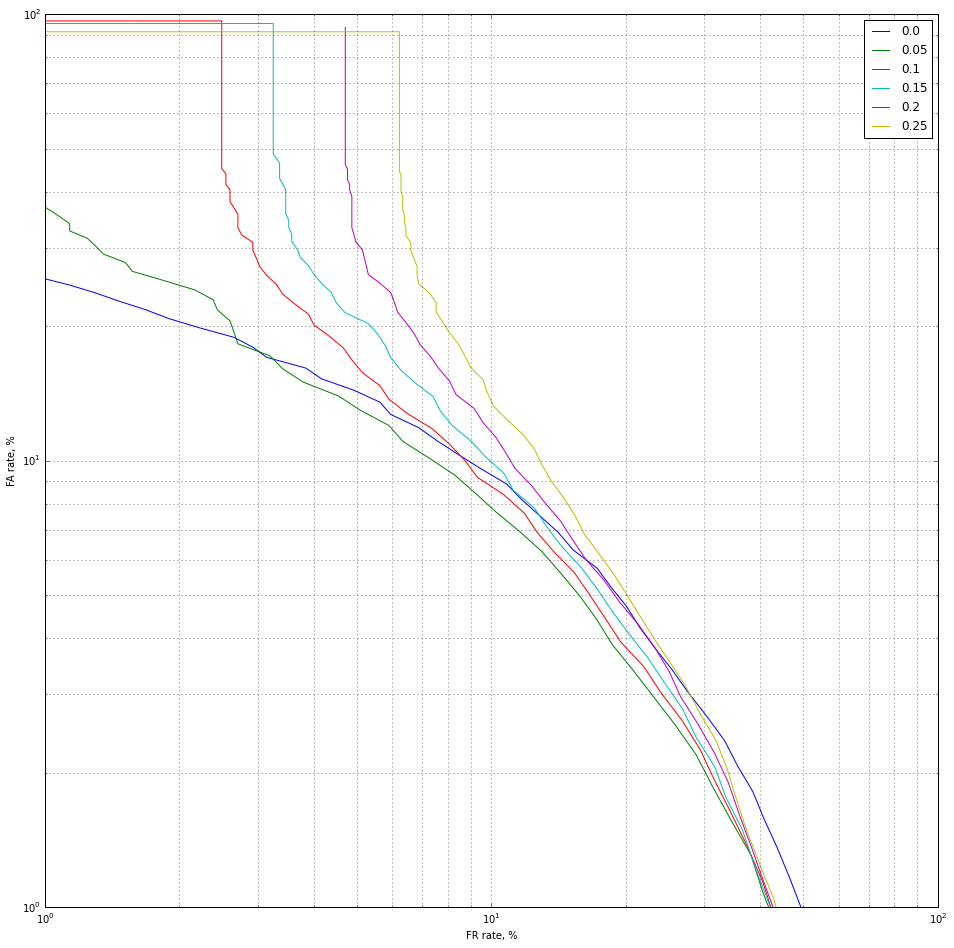

In [30]:
import hickle
plt.figure(figsize=(16,16))
for th in th_range:
    (FR,FA) = hickle.load('../data/th/'+str(th),safe = False )
    draw_DET(FR,FA)


plt.legend(th_range.astype(np.str))
plt.show()

## Frame accuracy

In [20]:
argmax  = data.ix[:,data.shape[1]-463:-1].idxmax(axis=1).apply(lambda x: int(str(x).split('_')[-1]))
float(np.sum(argmax==data.label))/data.shape[0]

0.4259829723239624

## File accuracy

In [22]:
reduced = data.groupby('name').median()
argmax  = reduced.ix[:,data.shape[1]-463:-1].idxmax(axis=1).apply(lambda x: int(str(x).split('_')[-1]))
float(np.sum(argmax==reduced.label))/reduced.shape[0]

0.9329004329004329

dr1_f_cjf0_sa1


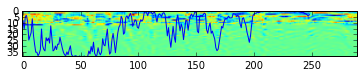

dr1_f_cjf0_sa2


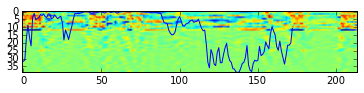

dr1_f_daw0_sa1


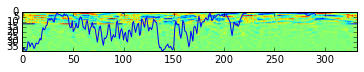

dr1_f_daw0_sa2


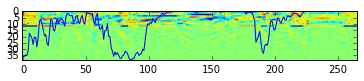

dr1_f_dml0_sa1


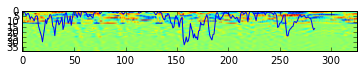

dr1_f_dml0_sa2


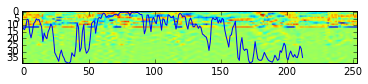

dr1_f_ecd0_sa1


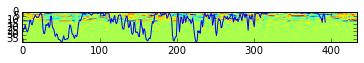

dr1_f_ecd0_sa2


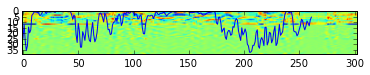

dr1_f_etb0_sa1


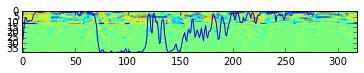

dr1_f_etb0_sa2


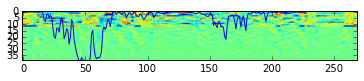

dr1_f_jsp0_sa1


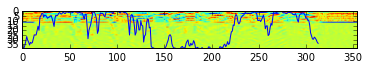

dr1_f_jsp0_sa2


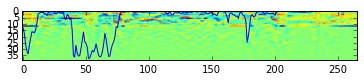

dr1_f_kfb0_sa1


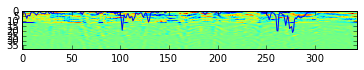

dr1_f_kfb0_sa2


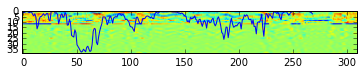

dr1_f_mem0_sa1


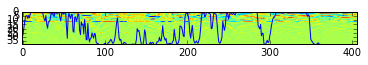

dr1_f_mem0_sa2


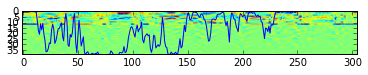

dr1_f_sah0_sa1


KeyboardInterrupt: 

In [25]:
import htkmfc
g = data.groupby('name')
data_val = hickle.load(open('../data/TIMIT/timit_id/db/sa/val.hdf5/data.hdf5','r'))
names = np.vectorize(lambda x : x[:-6])(data_val['tag'])

mfcc_path = '../data/TIMIT/timit_id/train/mfcc'

for idx,gr in g:
    mfcc_name = mfcc_path + '/' + idx + '.mfcc'
    mfcc = htkmfc.HTKFeat_read(mfcc_name).getall()
    print idx
    plt.plot(gr.true_class_prob*40)
    plt.imshow(mfcc.T)
    plt.show()